In [10]:
from Supportingcode.Data_reader import Data
from Supportingcode.Algorithms import rescheduling_problem
import igraph

In [11]:
local = 'Data/1-hour-interval-madrid/1-hour-interval-madrid/testsuite/'
info = Data('Example', local)
tracks, stations, trains, current_time, maxtime = info.read_from_CSV()

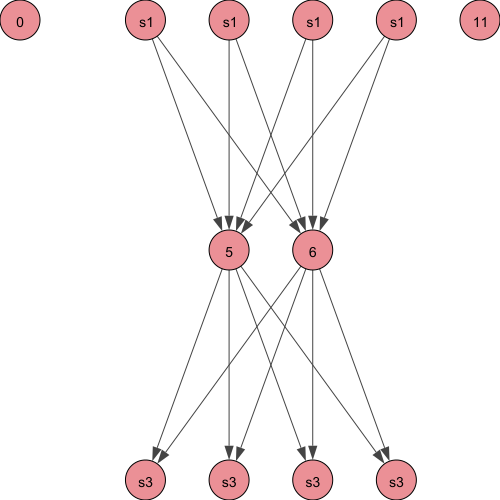

In [12]:
rescheduling = rescheduling_problem(tracks, stations, trains, current_time, maxtime, 'Examples')
rescheduling.plot_graph(True)

In [13]:
for train in trains.values():
    print('begin')
    print(f'job{train.id}',train.begin_schedule)
    print('end')
    print(f'job{train.id}',train.end_schedule)
for train in trains.values():
    print(f'train{train.id}=',train.current_route)

begin
job1 {1: 6, 5: 9, 7: 10}
end
job1 {1: 10, 5: 11, 7: 14}
begin
job2 {1: 1, 5: 3, 7: 4}
end
job2 {1: 4, 5: 5, 7: 7}
begin
job3 {1: 14, 5: 16, 7: 17}
end
job3 {1: 17, 5: 18, 7: 21}
begin
job4 {1: 10, 5: 12, 7: 13}
end
job4 {1: 13, 5: 14, 7: 17}
train1= [0, 1, 5, 7, 94]
train2= [0, 1, 5, 7, 94]
train3= [0, 1, 5, 7, 94]
train4= [0, 1, 5, 7, 94]


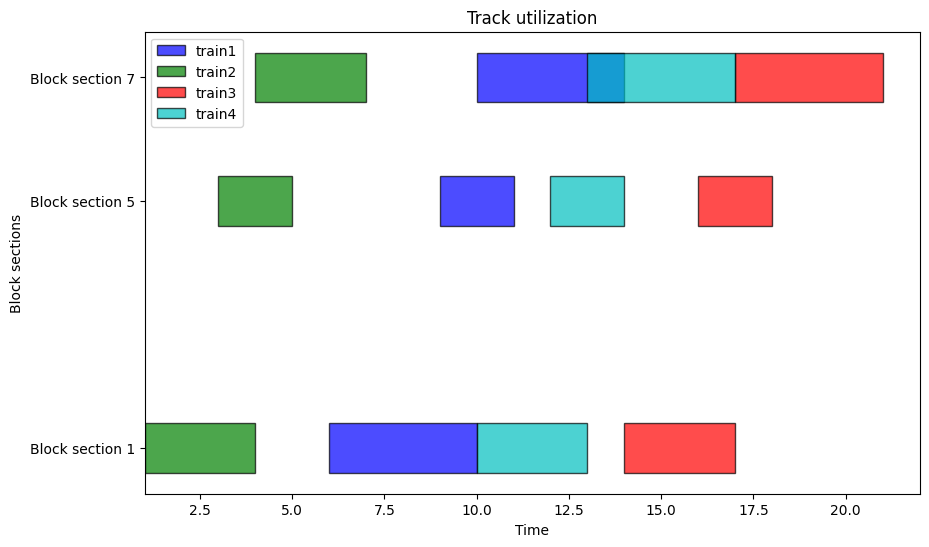

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Jobs = {
    'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
    'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
    'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
    'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(Jobs['train1'].keys())
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Track utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()


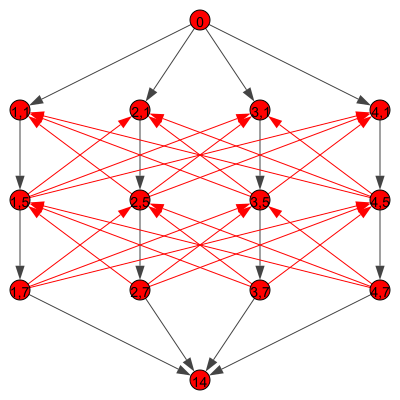

In [15]:
from igraph import Graph, plot

# Define the routes for each train
routes = {}
node=1
for i in range(4):
    for t in range(3):
        if t==0:
            routes[i] = [0,node]
        else:
            routes[i].append(node)
        node+=1
    routes[i].append(13)

label = [0]
for x in routes:
    for v in range(len(routes[x])):
        if v == 1:
            label.append(f'{x+1},1')
        if v==2:
            label.append(f'{x+1},5')
        if v==3:
            label.append(f'{x+1},7')
label.append(14)

layout = [
    (3, 0),
    (0, 2), (0, 4), (0, 6), 
    (2, 2), (2, 4), (2, 6), 
    (4, 2), (4, 4), (4, 6), 
    (6, 2), (6, 4), (6, 6),
    (3, 8)
]

alternatives =[]
for k in range(len(routes)):
    rest = list(range(len(routes)))
    rest.pop(k)
    for n in range(1,len(routes[k])-2):
        # print(k,n)
        for m in rest:
            alternatives.append((routes[m][n+1],routes[k][n]))
fixed = [(routes[k][v],routes[k][v+1])for k in routes for v in range(len(routes[k])-1)]

# print(fixed+alternatives)

# Create a directed graph
g = Graph(14, fixed ,directed=True)

for k in alternatives:
    g.add_edge(k[0],k[1],color = "red")

# print(g)
g.vs["layout"] = layout
g.vs['labels'] = label

plot(g, bbox=(400, 400), margin=20,vertex_label = g.vs['labels'], layout= g.vs["layout"])

In [16]:
Fixedroute_reschedule = rescheduling.fixed_route(True)
Newtimetable = Fixedroute_reschedule.times.extract_values()
print(Newtimetable)

{(1, 0): 0.0, (1, 1): 6.0, (1, 5): 8.0, (1, 7): 10.0, (1, 94): 12.0, (2, 0): 0.0, (2, 1): 1.0, (2, 5): 3.0, (2, 7): 4.0, (2, 94): 6.0, (3, 0): 0.0, (3, 1): 14.0, (3, 5): 16.0, (3, 7): 18.0, (3, 94): 20.0, (4, 0): 0.0, (4, 1): 10.0, (4, 5): 12.0, (4, 7): 14.0, (4, 94): 16.0}


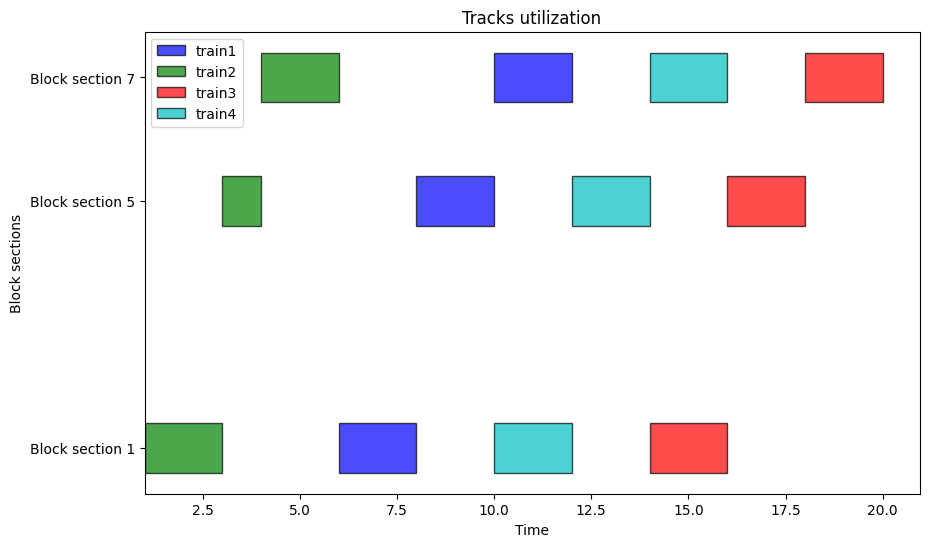

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
route = {}
schedulestart = {}
for k in Newtimetable:
    if k[1] ==0:
        route[k[0]] =[0]
    else:
        route[k[0]].append(k[1])
Jobs={f'train{k}': {route[k][i]: (Newtimetable[k,route[k][i]],Newtimetable[k,route[k][i+1]]) for i in range(1,len(route[k])-1)} for k in route}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(Jobs['train1'].keys())
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()